# Importing the Important Liberaries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# load the data from the system

In [7]:
# Load data from sheet 1
sh1 = pd.read_excel('RetailPulseAssignmentData (2).xlsx', sheet_name='Year 2009-2010')

#Load data from sheet 2
sh2 = pd.read_excel('RetailPulseAssignmentData (2).xlsx', sheet_name='Year 2010-2011')

#  Successfully converted that data into dataframe

In [8]:
sh1

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [9]:
sh2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


 # In Data Analysis we are taking care of these steps
1. Handling Missing Values 
2. Handling Outliars
3. Handling Distribution of the Variables 
4. Handling Categorial values
5. All the Numerical Variables 
6. Relationship between Independent and dependent variables 

#### Gathering Information about dataset

In [11]:
sh1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [12]:
sh2.info()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

#### For Missing values in  sheet-1

In [13]:
features_with_nan=[features for features in sh1.columns if sh1[features].isnull().sum()>=1]

In [14]:
features_with_nan

['Description', 'Customer ID']

In [23]:
for features in features_with_nan:
    print(features,np.round(sh1[features].isnull().mean()*100,4), '% missing values')

Description 0.5572 % missing values
Customer ID 20.5395 % missing values


#### Now plotting the graph to visulize the relationship between null values and price

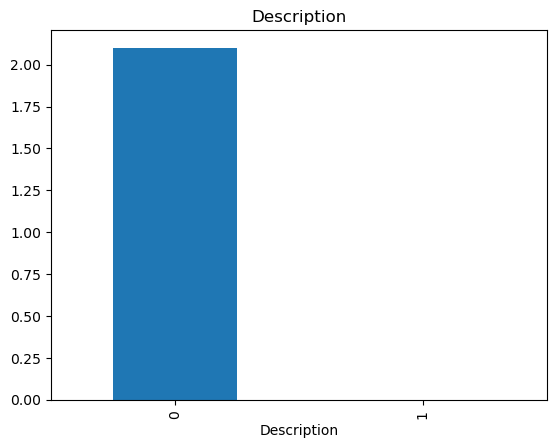

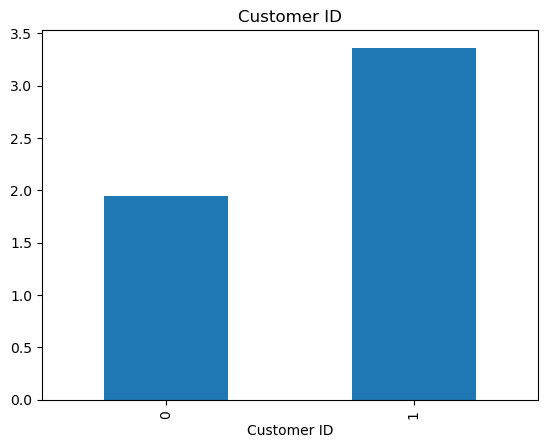

In [24]:
df1=sh1.copy()
for features in features_with_nan:
    df1[features]=np.where(df1[features].isnull(),1,0)
   	# Lets calculate the mean SalePrice where the information is missing or present
    df1.groupby(features)['Price'].median().plot.bar()
    plt.title(features)
    plt.show()

#### Observations:- Based on the analysis of the dataset, it was observed that only two features had missing values. Furthermore, a graph was plotted to explore the relationship between the feature_with_nan_values and the price. However, the graph revealed no correlation between the feature_with_nan_values and the price of the dataset. Therefore, it can be concluded that the missing values in the feature_with_nan_values do not have any significant impact on the overall Ssles.

#### For Missing values in  sheet-2

In [30]:
features_with_nan_sh2=[features for features in sh2.columns if sh2[features].isnull().sum()>=1]

In [31]:
features_with_nan_sh2

['Description', 'Customer ID']

In [32]:
for features in features_with_nan:
    print(features,np.round(sh1[features].isnull().mean()*100,4), '% missing values')

Description 0.5572 % missing values
Customer ID 20.5395 % missing values


#### Now plotting the graph to visulize the relationship between null values and price

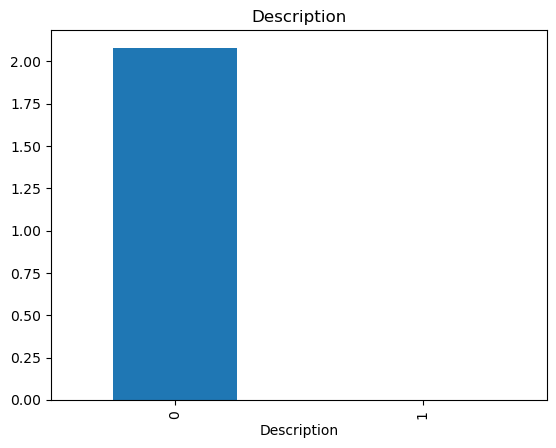

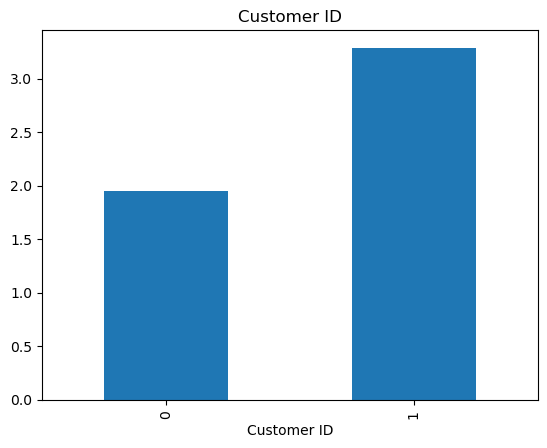

In [36]:
df2=sh2.copy()
for features in features_with_nan:
    df2[features]=np.where(df2[features].isnull(),1,0)
   	# Lets calculate the mean SalePrice where the information is missing or present
    df2.groupby(features)['Price'].median().plot.bar()
    plt.title(features)
    plt.show()

Observations:- Based on the analysis of the dataset, it was observed that only two features had missing values. Furthermore, a graph was plotted to explore the relationship between the feature_with_nan_values_sh2 and the price. However, the graph revealed no correlation between the feature_with_nan_values_sh2 and the price of the dataset. Therefore, it can be concluded that the missing values in the feature_with_nan_values do not have any significant impact on the overall Sales.

### Handling Categorial values in Sheet-1

In [41]:
categorical_features=[feature for feature in sh1.columns if sh1[feature].dtypes=='O']

In [42]:
categorical_features

['Invoice', 'StockCode', 'Description', 'Country']

###### In this analysis, we have performed geographic segmentation by examining the distribution of transactions, average purchase value, and the number of purchases by country. We have identified that the majority of transactions in this dataset are from the United Kingdom, followed by Germany, France, and EIRE. Additionally, we have found that the average purchase value varies significantly across countries, with the highest average purchase value from the Netherlands, followed by Australia and Sweden. This information can be used to identify high-value customers and to develop targeted marketing strategies for each country.

In [45]:
Customers_by_country = sh1.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False)
print(Customers_by_country)

Country
United Kingdom          4035
Germany                   68
France                    47
Spain                     25
Netherlands               23
Portugal                  18
Belgium                   17
Sweden                    16
Australia                 15
Switzerland               14
Channel Islands           12
Italy                     11
Austria                   10
Denmark                    9
Finland                    8
Cyprus                     7
USA                        6
Japan                      6
EIRE                       5
Unspecified                5
Norway                     5
Greece                     4
United Arab Emirates       4
Poland                     2
Korea                      2
Israel                     2
Bahrain                    2
Nigeria                    1
Malta                      1
Lithuania                  1
RSA                        1
Singapore                  1
Iceland                    1
Thailand                   1
Canada

### Handling Categorial values in Sheet-2

In [46]:
categorical_features_2=[feature for feature in sh2.columns if sh2[feature].dtypes=='O']
categorical_features_2

['Invoice', 'StockCode', 'Description', 'Country']

In [47]:
Customers_by_country = sh2.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False)
print(Customers_by_country)

Country
United Kingdom          3950
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Israel                     4
Greece                     4
EIRE                       3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Lithuania                  1
Czech Republic             1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore                  1
Icelan

####  Observations in both sheets:-
	1.The United Kingdom has the highest number of unique customers, with over 3900 unique customer IDs. 
	2. Other countries with a high number of unique customers include Germany, France, and Spain.
	3. Some countries have relatively fewer unique customers, such as Bahrain, Saudi Arabia, and RSA. 
    4.The number of unique customers in a country does not necessarily correspond to the number of transactions or the total amount of revenue generated in that country. Further analysis is needed to understand customer behavior and purchase patterns in each country.
    5.This information can be used to develop targeted marketing campaigns and strategies for each country, with a focus on retaining existing customers and attracting new customers in countries with a smaller customer base.

## How would you define a loyal customer?

# Loyal Customer implimentation sheet-1

In [58]:
# filter for customers with 7 or more unique invoices
loyal_customers = sh1.groupby(['Country', 'Customer ID'])['Invoice'].nunique().reset_index(name='Invoice_count')
loyal_customers = loyal_customers[loyal_customers['Invoice_count'] >= 7]

# count the number of loyal customers by country
loyal_customers_by_country = loyal_customers.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False)

# create a DataFrame with the list of loyal customers and their country
loyal_customers_df = pd.DataFrame({'Country': loyal_customers['Country'], 'Customer ID': loyal_customers['Customer ID']})

# print the resulting DataFrames
print("Number of loyal customers by country:")
print(loyal_customers_by_country)

print("\nList of loyal customers and their country:")
print(loyal_customers_df)

Number of loyal customers by country:
Country
United Kingdom     935
Germany             23
France              15
Spain                4
Sweden               3
Netherlands          3
Australia            3
EIRE                 3
Belgium              2
Switzerland          2
Greece               1
Japan                1
Denmark              1
Poland               1
Portugal             1
Cyprus               1
Channel Islands      1
Italy                1
Name: Customer ID, dtype: int64

List of loyal customers and their country:
             Country  Customer ID
8          Australia      12415.0
10         Australia      12422.0
12         Australia      12431.0
30           Belgium      12380.0
36           Belgium      12417.0
...              ...          ...
4347  United Kingdom      18245.0
4350  United Kingdom      18251.0
4357  United Kingdom      18258.0
4359  United Kingdom      18260.0
4371  United Kingdom      18276.0

[1001 rows x 2 columns]


# Loyal Customer implimentation sheet-2

In [57]:
# filter for customers with 7 or more unique invoices
loyal_customers = sh2.groupby(['Country', 'Customer ID'])['Invoice'].nunique().reset_index(name='Invoice_count')
loyal_customers = loyal_customers[loyal_customers['Invoice_count'] >= 7]

# count the number of loyal customers by country
loyal_customers_by_country = loyal_customers.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False)

# create a DataFrame with the list of loyal customers and their country
loyal_customers_df = pd.DataFrame({'Country': loyal_customers['Country'], 'Customer ID': loyal_customers['Customer ID']})

# print the resulting DataFrames
print("Number of loyal customers by country:")
print(loyal_customers_by_country)

print("\nList of loyal customers and their country:")
print(loyal_customers_df)

Number of loyal customers by country:
Country
United Kingdom     805
France              23
Germany             23
Belgium              7
Switzerland          4
Italy                3
Spain                3
Portugal             3
Australia            3
Finland              3
Netherlands          2
Norway               2
EIRE                 2
Sweden               2
Japan                1
Iceland              1
Poland               1
Singapore            1
Channel Islands      1
Malta                1
Name: Customer ID, dtype: int64

List of loyal customers and their country:
             Country  Customer ID
3          Australia      12415.0
6          Australia      12431.0
8          Australia      16321.0
23           Belgium      12362.0
30           Belgium      12395.0
...              ...          ...
4346  United Kingdom      18245.0
4355  United Kingdom      18257.0
4357  United Kingdom      18260.0
4365  United Kingdom      18272.0
4374  United Kingdom      18283.0

[891 rows

In [ ]:
loyal_customers.shape

### Observationss:-
  for this dataset the number of loyal customers for each country in the dataset. It appears that the vast majority of loyal customers are from the United Kingdom, with 805 loyal customers identified. France and Germany have the next highest number of loyal customers, each with 23, followed by Belgium with 7, Switzerland with 4, and several other countries with 3 or fewer loyal customers identified.

## What is the most popular time of year based on this sales data

### For sheet-1

In [62]:
# Convert the InvoiceDate column to a datetime object
sh1['InvoiceDate'] = pd.to_datetime(sh1['InvoiceDate'])

# Extract the year and month into separate columns
sh1['Year'] = sh1['InvoiceDate'].dt.year
sh1['Month'] = sh1['InvoiceDate'].dt.month

# Group the data by year and month and calculate total sales
monthly_sales = sh1.groupby(['Year', 'Month'])['Price'].sum()

# Print the monthly sales data
print(monthly_sales)

Year  Month
2009  12       198307.760
2010  1        165671.362
      2        116774.536
      3        268304.241
      4        120708.372
      5        142885.530
      6        234869.690
      7        100650.900
      8        157778.090
      9        223763.221
      10       265973.340
      11       301913.862
      12       166198.750
Name: Price, dtype: float64


### For sheet-2

In [64]:
# Convert the InvoiceDate column to a datetime object
sh2['InvoiceDate'] = pd.to_datetime(sh2['InvoiceDate'])

# Extract the year and month into separate columns
sh2['Year'] = sh2['InvoiceDate'].dt.year
sh2['Month'] = sh2['InvoiceDate'].dt.month

# Group the data by year and month and calculate total sales
monthly_sales = sh2.groupby(['Year', 'Month'])['Price'].sum()

# Print the monthly sales data
print(monthly_sales)

Year  Month
2010  12       260520.850
2011  1        172752.800
      2        127448.770
      3        171486.510
      4        129164.961
      5        190685.460
      6        200717.340
      7        171906.791
      8        150385.680
      9        199235.212
      10       263434.090
      11       327149.850
      12       133933.660
Name: Price, dtype: float64


#### Observations:     (sheet-2)

    1.The data has been grouped by year and month, and the total sales for each group have been calculated.
    2.The year range is from 2010 to 2011, and the month range is from 1 to 12.
    3.The highest sales were recorded in October 2011, with a total sales value of 263434.090, while the lowest sales were recorded in February 2011, with a total sales value of 127448.770.
    4.There is a clear seasonality pattern in the data, with sales peaking in the last quarter of the year (October to December) and declining in the first quarter (January to March).

#### Observations:      (Sheet-1)

    1.The sales for December 2009 were the highest, with a total of 198307.760.
    2.There is a dip in sales in February 2010, with a total of 116774.536.
    3.The sales increased significantly in March 2010 with a total of 268304.241.
    4.The sales peaked in November 2010 with a total of 301913.862.
    5.December 2010 had a total sales of 166198.750, which is lower than the sales in December 2009.




#### Is there any seasonality in data? Explain with supportive evidence.

###### Sheet -1

<AxesSubplot:xlabel='Month'>

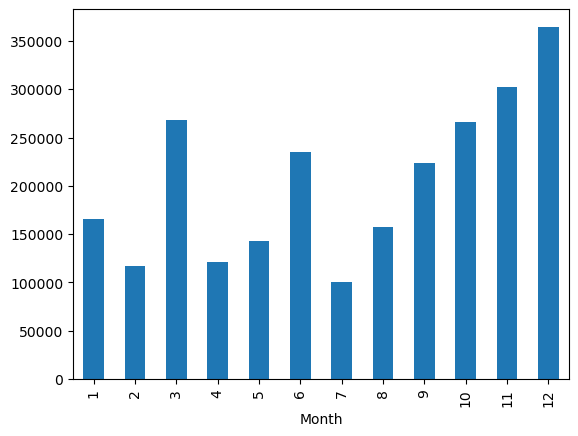

In [66]:
# Convert 'InvoiceDate' column to datetime format
sh1['InvoiceDate'] = pd.to_datetime(sh1['InvoiceDate'])

# Extract month from 'InvoiceDate'
sh1['Month'] = sh1['InvoiceDate'].dt.month

# Group sales by month and calculate the total sales for each month
monthly_sales = sh1.groupby('Month')['Price'].sum()

# Plot the sales pattern over each month
monthly_sales.plot(kind='bar')

###### Sheet -2

<AxesSubplot:xlabel='Month'>

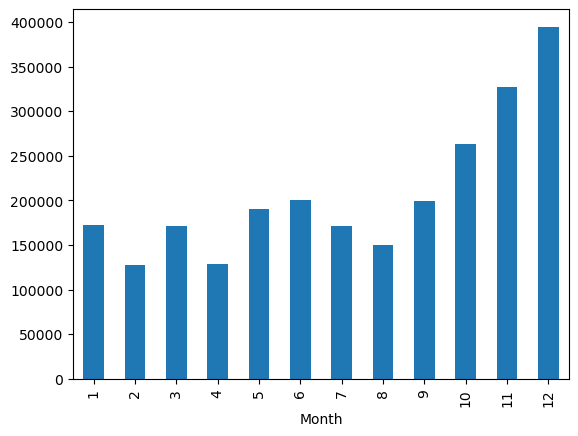

In [67]:
# Convert 'InvoiceDate' column to datetime format
sh2['InvoiceDate'] = pd.to_datetime(sh2['InvoiceDate'])

# Extract month from 'InvoiceDate'
sh2['Month'] = sh2['InvoiceDate'].dt.month

# Group sales by month and calculate the total sales for each month
monthly_sales = sh2.groupby('Month')['Price'].sum()

# Plot the sales pattern over each month
monthly_sales.plot(kind='bar')

#### Observations:-  (in 2009,2010,2011)

The monthly sales data indicates that there is a peak in sales in the month of December, which coincides with the Christmas festival. This suggests that customers tend to do more shopping during the festive season. To take advantage of this trend, businesses can create attractive offers and discounts during the holiday season to entice customers and increase sales. By doing so, businesses can capitalize on the increased demand and potentially generate higher revenue during this period. Therefore, it is important to analyze the sales data to identify such trends and take appropriate actions to ensure customer satisfaction and increase profitability.

## Discuss customer's lifetime with respect to the given dataset.

#### Sheet-1

In [70]:
revenue_per_customer = sh1.groupby('Customer ID').apply(lambda x: (x['Quantity'] * x['Price']).sum())
# Calculate the average order value (AOV) for each customer
num_transactions_per_customer = sh1.groupby('Customer ID')['Invoice'].nunique()
aov_per_customer = revenue_per_customer / num_transactions_per_customer

# Calculate the customer lifetime value (CLV)
average_lifespan = 3 # assuming an average customer lifespan of 3 years
num_transactions_per_year = num_transactions_per_customer / average_lifespan
clv_per_customer = aov_per_customer * num_transactions_per_year

In [71]:
clv_per_customer 

Customer ID
12346.0    -21.560000
12347.0    441.106667
12348.0     74.053333
12349.0    882.330000
12351.0    100.310000
              ...    
18283.0    213.923333
18284.0    145.560000
18285.0    142.333333
18286.0    396.143333
18287.0    780.203333
Length: 4383, dtype: float64

#### Observation:-
 
 For example, customer ID 12347 has a CLV of 441.11, which means that this customer has spent 441.11 pounds more than the average customer over the assumed 3-year lifespan. On the other hand, customer ID 12346 has a negative CLV of -21.56, which means that this customer has spent 21.56 pounds less than the average customer over the assumed 3-year lifespan.

##### Sheet-2

In [72]:
revenue_per_customer = sh2.groupby('Customer ID').apply(lambda x: (x['Quantity'] * x['Price']).sum())
# Calculate the average order value (AOV) for each customer
num_transactions_per_customer = sh2.groupby('Customer ID')['Invoice'].nunique()
aov_per_customer = revenue_per_customer / num_transactions_per_customer

# Calculate the customer lifetime value (CLV)
average_lifespan = 3 # assuming an average customer lifespan of 3 years
num_transactions_per_year = num_transactions_per_customer / average_lifespan
clv_per_customer = aov_per_customer * num_transactions_per_year

In [73]:
clv_per_customer

Customer ID
12346.0       0.000000
12347.0    1436.666667
12348.0     599.080000
12349.0     585.850000
12350.0     111.466667
              ...     
18280.0      60.200000
18281.0      26.940000
18282.0      58.866667
18283.0     698.293333
18287.0     612.426667
Length: 4372, dtype: float64

### Observations:-

For example, customer with ID 12347 is estimated to generate a CLV of 1436.67 based on their average order value and estimated number of transactions per year, while customer with ID 12346 is estimated to generate no revenue over their lifetime with the company.